In [1]:
import sys
import os
import numpy as np
# Add the root directory of the package to sys.path
sys.path.append('/Users/user/PythonProjects/')

from spdust_python.spdust.charge_dist import *
from spdust_python.spdust.emissivity import *
import matplotlib.pyplot as plt


l_a computed
readPAH computed
Loaded previously computed Jpeisrf arrays from file.
Maximum energy in the Qabs_hnu_tab is 1239.84 eV.
FIR_integral_charged shape: (30, 30)
Na: 30, Nchi: 30
Tev table already exists at /Users/user/PythonProjects/spdust_python/spdust/Data_Files/Tev_30a_30chi.txt.
I(Zg<0, parabolic) stored
I(rot, e, Zg <> 0) stored
Gaunt factor stored


## Consistency of the subroutines

In [2]:
from spdust_python.utils.util import *
from spdust_python.spdust.grain_properties import *
from spdust_python.spdust.emissivity import *

In [3]:
# See DL98b table I for the parameters

# nh: number density of hydrogen atoms in cm^-3
# T: temperature in K
# Chi: intensity of the radiation field relative to the average interstelar radiation field
# xh: hydrogen ionization fraction
# xC: ionized carbon fractional abundance
# y: molecular hydrogen fractional abundance
# gamma: H2 formation efficiency
# dipole: rms dipole moment for dust grains in Debye 
# line: parameters for the grain size distribution : provide the corresponding line of table 1 of Weingartner
# & Draine (2001b) (starting at one) under the tag line

DC_params = {'nh' : 1e4, 'T': 10., 'Chi': 1e-4, 'xh': 0., 'xC': 1e-6, 'y' : 0.999,  'gamma': 0, 'dipole': 9.3, 'line':7}

MC_params = {'nh' : 3e2, 'T': 20., 'Chi': 1e-2, 'xh': 0., 'xC': 1e-4, 'y' : 0.99,  'gamma': 0, 'dipole': 9.3, 'line':7}    

CNM_params = {'nh' : 30, 'T': 100., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

WNM_params = {'nh' : 0.4, 'T': 6000., 'Chi': 1., 'xh': 0.1, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

WIM_params = {'nh' : 0.1, 'T': 8000., 'Chi': 1., 'xh': 0.99, 'xC': 1e-3, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

RN_params = {'nh' : 1000., 'T': 100., 'Chi': 1000., 'xh': 0.001, 'xC': 2e-4, 'y' : 0.5, 'gamma': 0, 'dipole': 9.3, 'line':7}

PDR_params = {'nh' : 1e5, 'T': 300., 'Chi': 3000., 'xh': 0.0001, 'xC': 2e-4, 'y' : 0.5, 'gamma': 0, 'dipole': 9.3, 'line':7}

In [4]:
#power_per_grain = dP_dnu_dOmega(WIM_params, a, beta0, 2/3, 20, \tumbling)

In [5]:
a_min = 3.5e-8
a_max = 3.5e-7
Na = 30
a_tab = makelogtab(a_min, a_max, Na)
Da_over_a = DX_over_X(a_min, a_max, Na)
a_0 = a_tab[0]
a_29 = a_tab[29]
mu_1d_7 = CNM_params['dipole']
beta0 = mu_1d_7 / np.sqrt(N_C(1e-7) + N_H(1e-7)) * cgsconst.debye

In [6]:
fZ_list = [charge_dist(CNM_params, a_tab[i]) for i in range(len(a_tab)) ]
Z2_list = [np.sum(fZ_list[i][0, :]**2 * fZ_list[i][1, :]) for i in range(len(a_tab))]
mu_rms_list = [rms_dipole(a_tab[i], Z2_list[i], beta0) for i in range(len(a_tab))]
ip=2/3
mu_ip_list = [mu_rms_list[i]*np.sqrt(ip) for i in range(len(a_tab))]
mu_op_list = [mu_rms_list[i]*np.sqrt(1-ip) for i in range(len(a_tab))]

In [7]:
fZ_list[0].shape

(2, 4)

In [13]:
Gp_sphere_per_mu2_averaged(CNM_params, a_tab[0], fZ_list[0], 2e9)

phi_index: 222
gp_neutral_phi_index_20: 16.27517
phi_coeff: 0.3834835759202212
Omega_indices 66
Omega_coeff 0.23270907355053505
phi_index: 222
gp_neutral_phi_index_20: 16.27517
phi_coeff: 0.3834835759202212
Omega_indices 72
Omega_coeff 0.836802843312417


array([8.99760654e+36])

In [ ]:
# Exactly equivalent (7位有效数字):
# hnu_pet, IPv, la_tab, hnu_tab, nu_uisrf, Jpe, fZ
# tau_H, tau_ed
# omega_peak_th, 

In [9]:
from spdust_python.spdust.plasmadrag import * 


In [10]:
little_gp_neutral(31, 0.0002665)

6.1845244697760124

In [35]:
power_per_grain_29 = dP_dnu_dOmega(WIM_params, a_tab[29], beta0, ip, Ndipole, tumbling=False)

In [56]:
print(power_per_grain_0[0,0])
print(nu_tab_a0[0])

130036615.12935442
949862440.0


In [9]:
np.array(3).reshape(-1).shape

(1,)

In [57]:
print(power_per_grain_0[0,-1])
print(nu_tab_a0[-1])

1256869488179.5737
783532540000.0


In [36]:
nu_tab_a0 = np.loadtxt('/Users/user/PythonProjects/spdust_python/SPDUST.2.01/SpDust_IDL_routines/nu_tab_a3.6369281e-08.out')
emiss_a0 = np.loadtxt('/Users/user/PythonProjects/spdust_python/SPDUST.2.01/SpDust_IDL_routines/emiss_a3.6369281e-08.out')
nu_tab_a29 = np.loadtxt('/Users/user/PythonProjects/spdust_python/SPDUST.2.01/SpDust_IDL_routines/nu_tab_a3.3682272e-07.out')
emiss_a29 = np.loadtxt('/Users/user/PythonProjects/spdust_python/SPDUST.2.01/SpDust_IDL_routines/emiss_a3.3682272e-07.out')

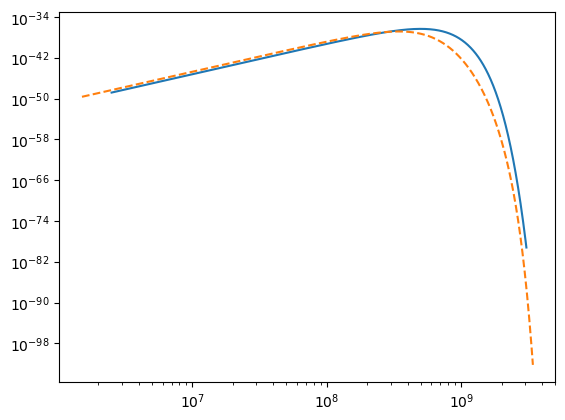

In [37]:
plt.loglog(nu_tab_a29, emiss_a29, label='a=3.5e-8 IDL')
plt.loglog(power_per_grain_29[0,:], power_per_grain_29[1,:], label='a=3.5e-8 Python', linestyle='--')

### Inputs for the IDL SPDUST

DC_params = {nh : 1d4, T: 10d, chi: 1d-4, xh: 0d, xc: 1d-6, y : 0.999d, gamma: 0d, dipole: 9.3d, line:7}

MC_params = {nh : 3d2, T: 20d, chi: 1d-2, xh: 0d, xc: 1d-4, y : 0.99d, gamma: 0d, dipole: 9.3d, line:7}

CNM_params = {nh : 30d, T: 1d2, chi: 1d, xh: 1.2d-3, xc: 3d-4, y : 0d, gamma: 0d, dipole: 9.3d, line:7}

WNM_params = {nh : 0.4d, T: 6d3, chi: 1d, xh: 0.1d, xc: 3d-4, y : 0d, gamma: 0d, dipole: 9.3d, line:7}

WIM_params = {nh : 0.1d, T: 8d3, chi: 1d, xh: 0.99d, xc: 1d-3, y : 0d, gamma: 0d, dipole: 9.3d, line:7}

RN_params = {nh : 1d3, T: 1d2, chi: 1d3, xh: 1d-3, xc: 2d-4, y : 0.5d, gamma: 0d, dipole: 9.3d, line:7}

PDR_params = {nh : 1d5, T: 3d2, chi: 3d3, xh: 1d-4, xc: 2d-4, y : 0.5d, gamma: 0d, dipole: 9.3d, line:7}

SPDUST, DC_params, '/Users/user/DC_emiss.out', /case1, min_freq = 1d, max_freq = 300d, N_freq = 500

In [4]:
from spdust_python.spdust.spdust import SPDUST

In [5]:
result_DC = SPDUST(DC_params, min_freq = 1, max_freq=300, n_freq=500, tumbling=False)
result_MC = SPDUST(MC_params, min_freq = 1, max_freq=300, n_freq=500, tumbling=False)
result_CNM = SPDUST(CNM_params, min_freq = 1, max_freq=300, n_freq=500)
result_WNM = SPDUST(WNM_params, min_freq = 1, max_freq=300, n_freq=500)
result_WIM = SPDUST(WIM_params, min_freq = 1, max_freq=300, n_freq=500)
result_RN = SPDUST(RN_params, min_freq = 1, max_freq=300, n_freq=500)
result_PDR = SPDUST(PDR_params, min_freq = 1, max_freq=300, n_freq=500)

mu(1E-7 cm) = 9.3 debye (beta = 0.3845076772265463 debye)
Assuming that disklike grains spin around their axis of greatest inertia
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
mu(1E-7 cm) = 9.3 debye (beta = 0.3845076772265463 debye)
Assuming that disklike grains spin around their axis of greatest inertia
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...
Saving results...


In [7]:
# Import the IDL results for comparison 
idl_result_DC = np.loadtxt('/Users/user/DC_emiss.out', comments=';')
idl_result_MC = np.loadtxt('/Users/user/MC_emiss.out', comments=';')
idl_result_CNM = np.loadtxt('/Users/user/CNM_emiss.out', comments=';')
idl_result_WNM = np.loadtxt('/Users/user/WNM_emiss.out', comments=';')
idl_result_WIM = np.loadtxt('/Users/user/WIM_emiss.out', comments=';')
idl_result_RN = np.loadtxt('/Users/user/RN_emiss.out', comments=';')
idl_result_PDR = np.loadtxt('/Users/user/PDR_emiss.out', comments=';')

In [8]:
python_results = [ result_DC, result_MC,
                    result_CNM, result_WNM, result_WIM, result_RN, result_PDR]
idl_results = [ idl_result_DC, idl_result_MC,
                idl_result_CNM, idl_result_WNM, idl_result_WIM, idl_result_RN, idl_result_PDR]
ISM_list = [ 'DC', 'MC', 'CNM', 'WNM', 'WIM', 'RN', 'PDR']

/var/folders/n6/tr4cmwxn5436s2wl6n6vtj240000gp/T/ipykernel_64955/1781244270.py:2: RuntimeWarning: invalid value encountered in divide
  ys = np.abs(python_results[i][1,:]-idl_results[i][:,1]) / idl_results[i][:,1]


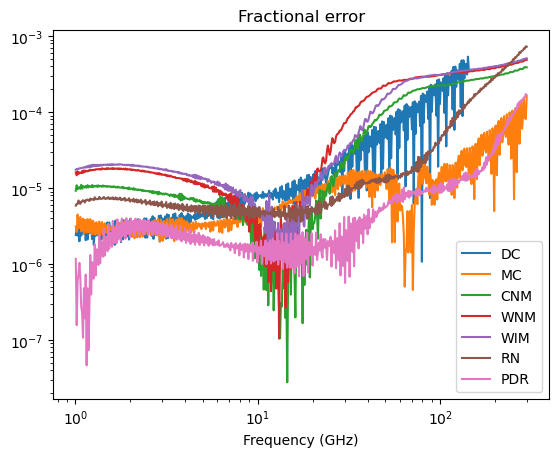

In [13]:
for i in range(7):
    ys = np.abs(python_results[i][1,:]-idl_results[i][:,1]) / idl_results[i][:,1]
    plt.plot(python_results[i][0], ys, label=ISM_list[i])

plt.xlabel('Frequency (GHz)')
plt.title('Fractional error')
plt.yscale('log')
plt.xscale('log')
plt.legend()

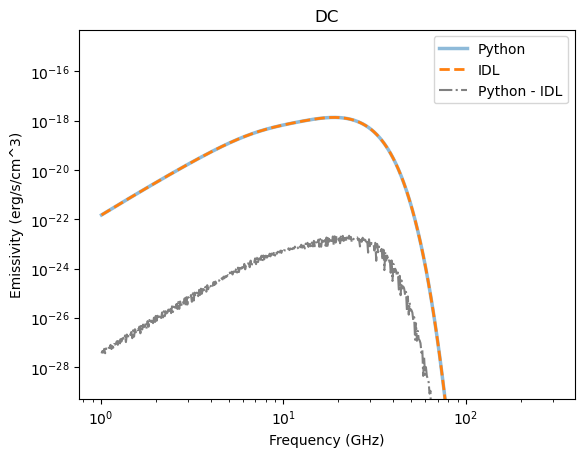

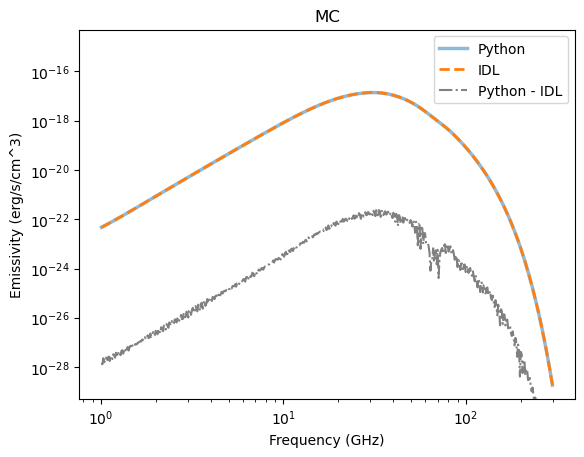

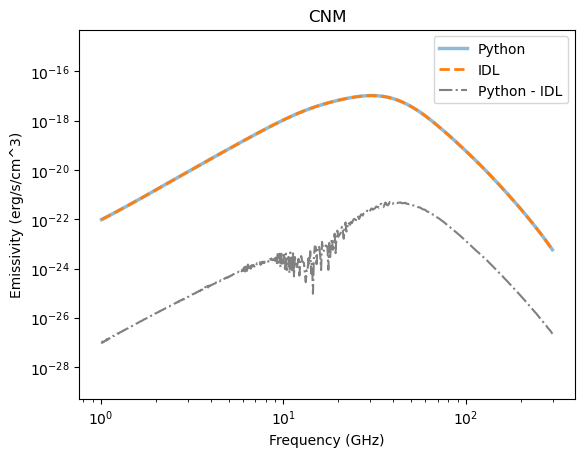

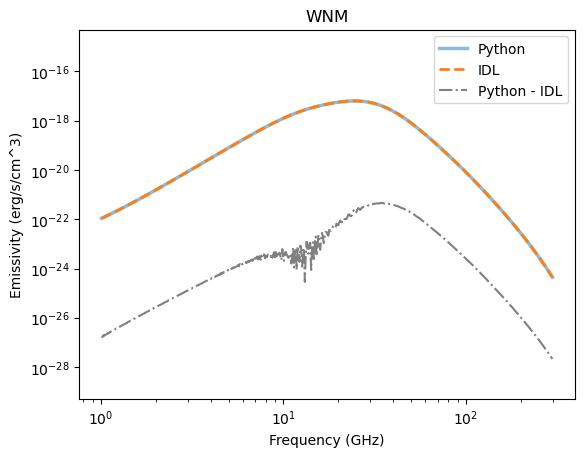

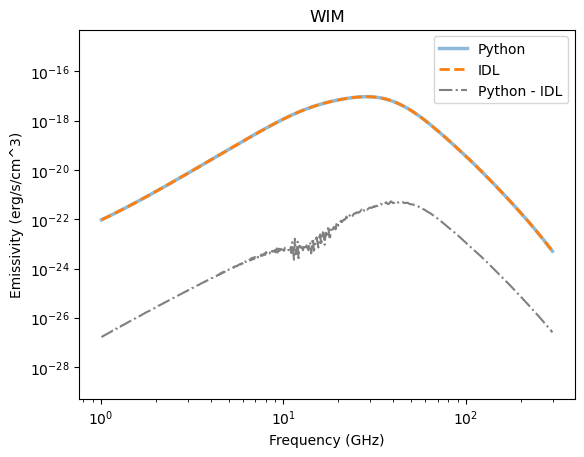

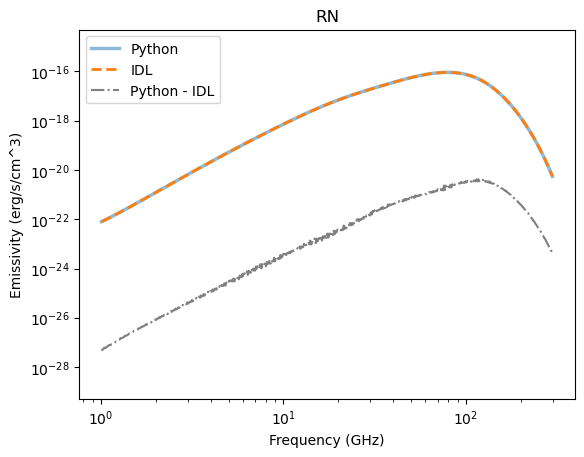

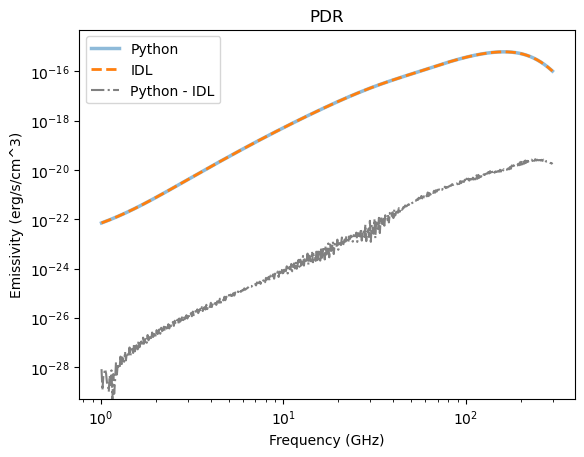

In [10]:

for i in range(7):
    plt.figure()
    plt.plot(python_results[i][0,:], python_results[i][1,:],  lw=2.5, alpha=0.5, label='Python')
    plt.plot(idl_results[i][:,0], idl_results[i][:,1], label='IDL', lw=2, linestyle='--')
    plt.plot(python_results[i][0,:], np.abs(python_results[i][1,:]-idl_results[i][:,1]), label='Python - IDL', linestyle='-.', color='gray')
    plt.legend()
    plt.title(ISM_list[i])
    plt.xlabel('Frequency (GHz)')
    plt.ylabel('Emissivity (erg/s/cm^3)')
    plt.ylim(5e-30, 5e-15)
    plt.yscale('log')
    plt.xscale('log')
    plt.show()    

In [ ]:
import matplotlib.pyplot as plt

for i in range(7):
    plt.figure()
    plt.plot(python_results[i][0,:], python_results[i][1,:],  lw=2.5, alpha=0.5, label='Python')
    plt.plot(idl_results[i][:,0], idl_results[i][:,1], label='IDL', lw=2, linestyle='--')
    plt.plot(python_results[i][0,:], np.abs(python_results[i][1,:]-idl_results[i][:,1]), label='Python - IDL', linestyle='-.', color='gray')
    plt.legend()
    plt.title(ISM_list[i])
    plt.xlabel('Frequency (GHz)')
    plt.ylabel('Emissivity (erg/s/cm^3)')
    plt.ylim(5e-27, 5e-15)
    plt.yscale('log')
    plt.xscale('log')
    plt.show()    